## Data import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data =pd.read_excel(r'C:\Users\SNEHA\Desktop\Machine learning\Clustering\Kmeans\cust_data.xlsx')
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## Data preprocessing

### Data type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

### Shape of dataset

In [4]:
data.shape

(30000, 38)

### Univariate analysis

In [5]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


### Missing values

In [6]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [8]:
data = data.drop(['Gender'],axis=1)
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [9]:
data.columns

Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

### Identifying outliers 

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_2344\3178338329.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


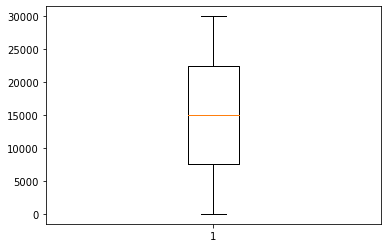

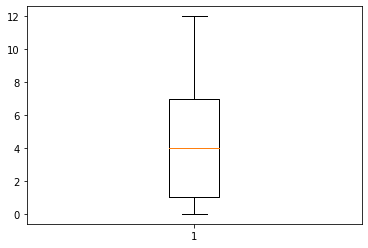

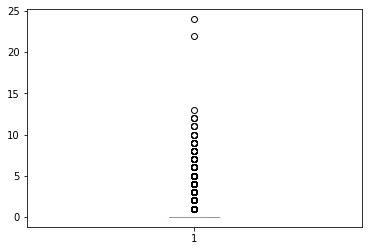

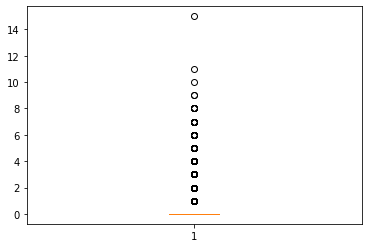

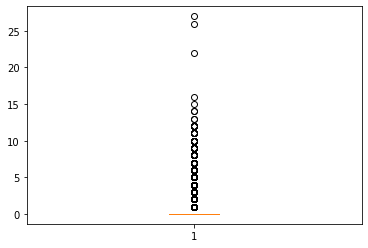

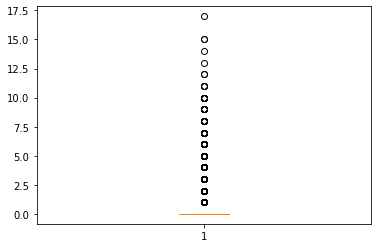

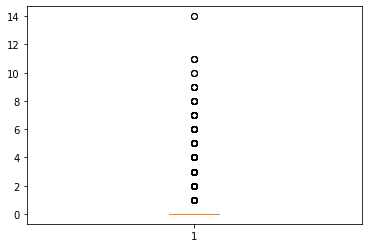

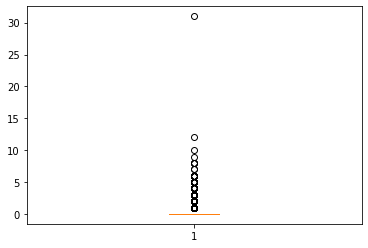

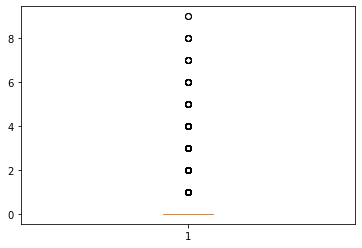

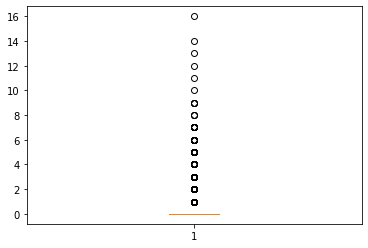

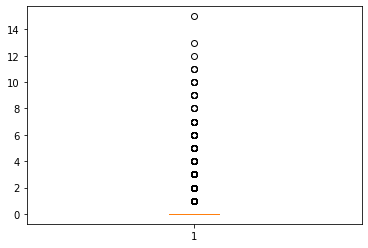

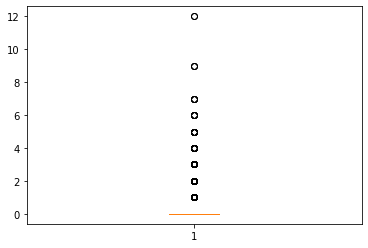

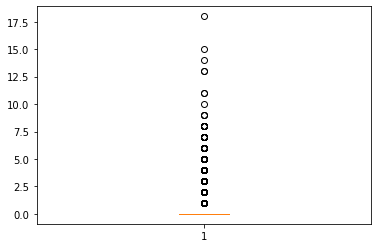

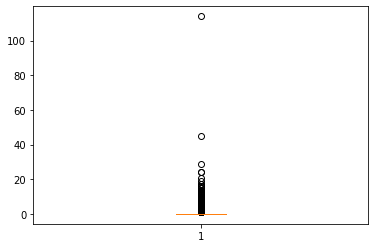

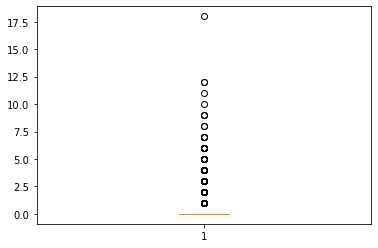

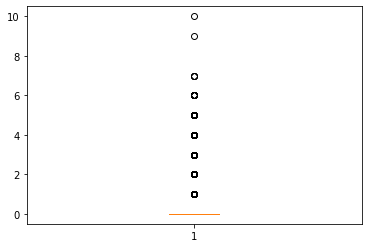

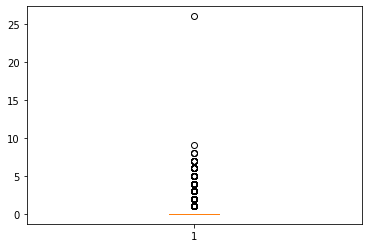

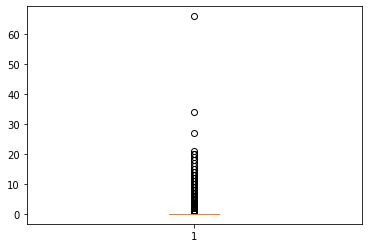

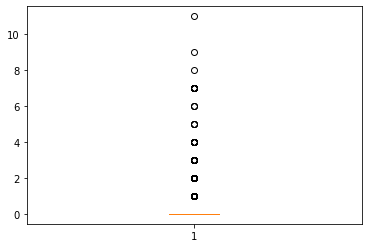

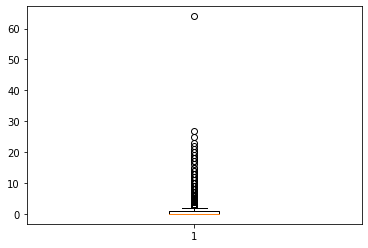

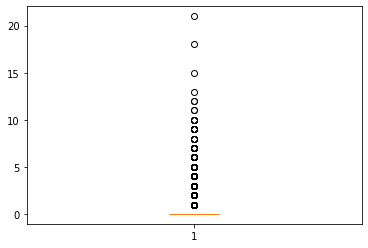

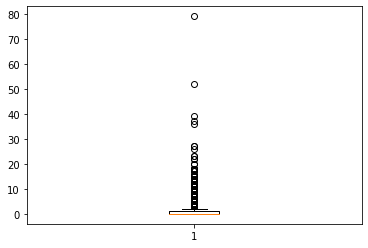

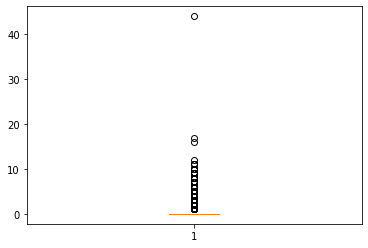

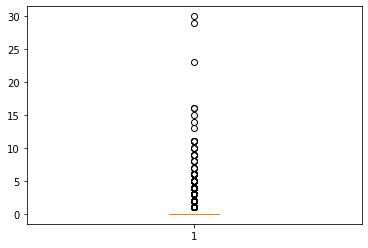

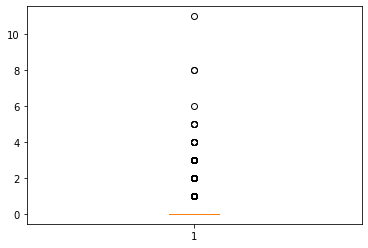

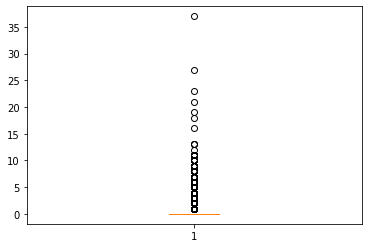

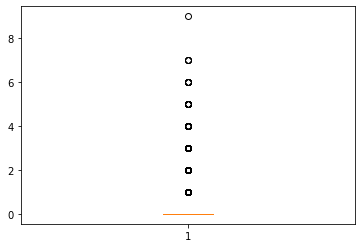

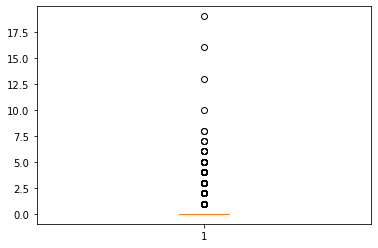

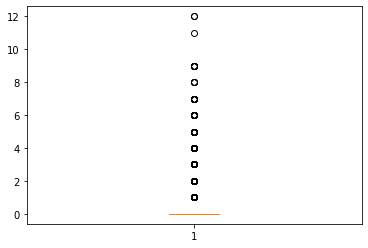

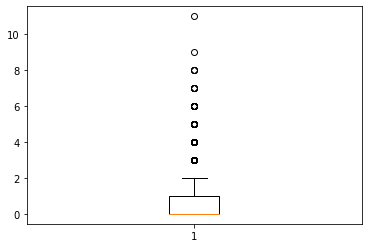

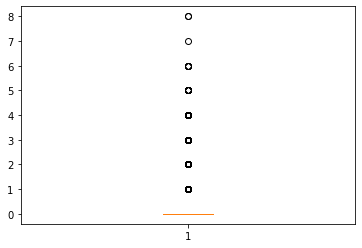

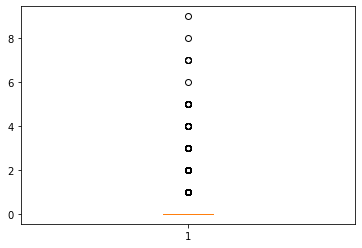

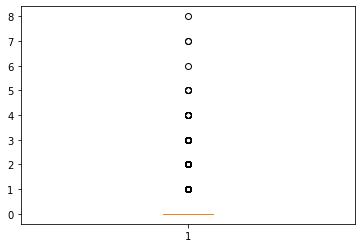

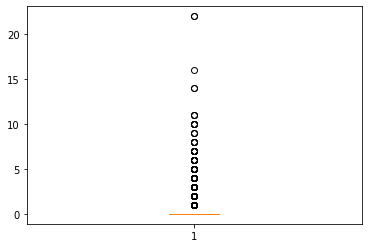

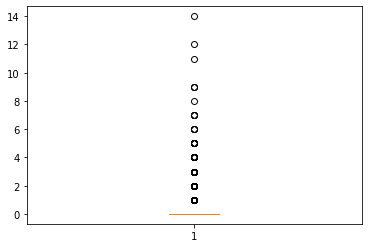

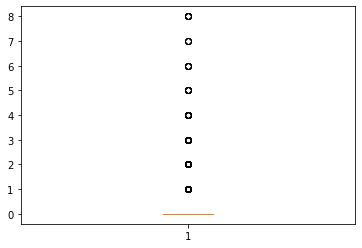

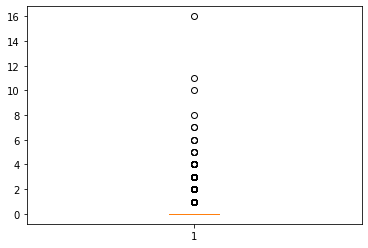

In [10]:
import matplotlib.pyplot as plt
i =data.columns

for x in i:
    plt.figure()
    plt.boxplot(data[x])

In [11]:
def outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper_limit =q3+ 1.5*iqr
    lower_limit =q1- 1.5*iqr
    
    data[col]=np.where(data[col]>upper_limit,upper_limit,
                     np.where(data[col]<lower_limit,lower_limit,data[col]))
    return data[col]

       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


       Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0          1.0     7.0     0.0       0.0      0.0   0.0   0.0   
1          2.0     0.0     0.0       0.0      0.0   0.0   0.0   
2          3.0     7.0     0.0       0.0      0.0   0.0   0.0   
3          4.0     0.0     0.0       0.0      0.0   0.0   0.0   
4          5.0    10.0     0.0       0.0      0.0   0.0   0.0   
...        ...     ...     ...       ...      ...   ...   ...   
29995  29996.0     0.0     0.0       0.0      0.0   0.0   0.0   
29996  29997.0     1.0     0.0       0.0      0.0   0.0   0.0   
29997  29998.0     0.0     0.0       0.0      0.0   0.0   0.0   
29998  29999.0     0.0     0.0       0.0      0.0   0.0   0.0   
29999  30000.0     3.0     0.0       0.0      0.0   0.0   0.0   

       Mondelez International  Wrangler  Vans  ...   LG  Dior  Scabal  \
0                         0.0       0.0   0.0  ...  0.0   0.0     0.0   
1                         0.0       0.0   0.0  ...  0.0   0.0     0.0   


C:\Users\SNEHA\AppData\Local\Temp\ipykernel_2344\1225084138.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


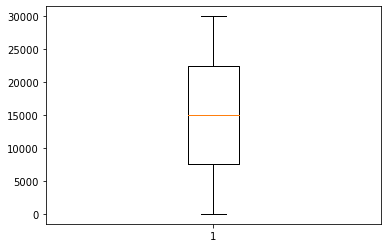

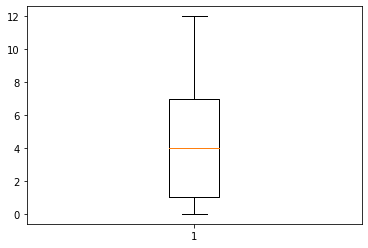

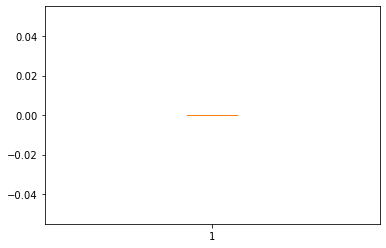

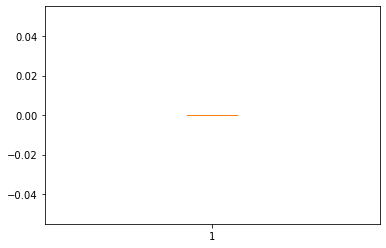

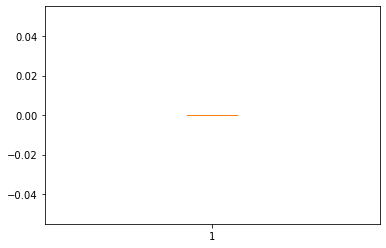

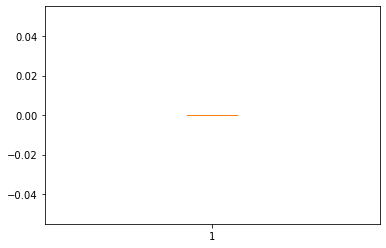

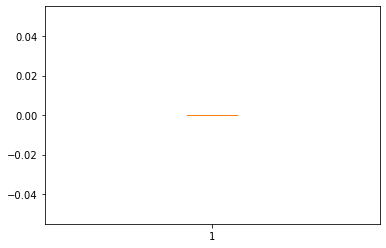

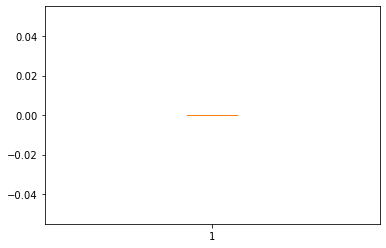

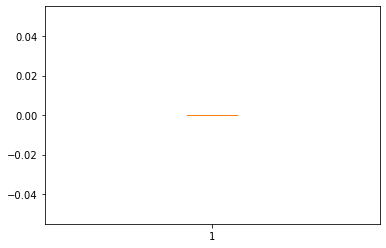

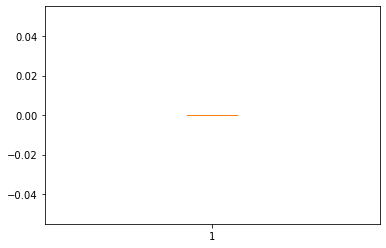

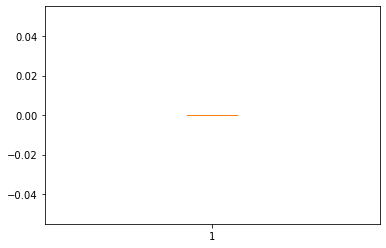

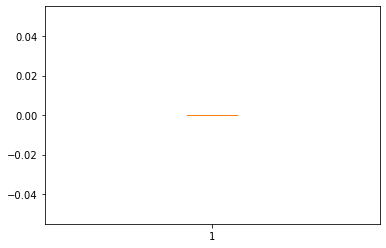

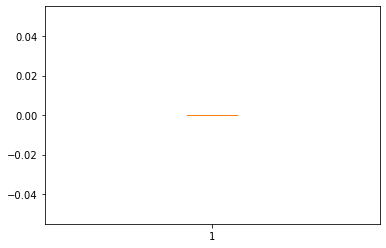

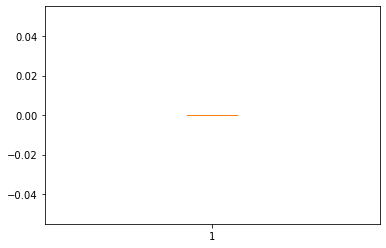

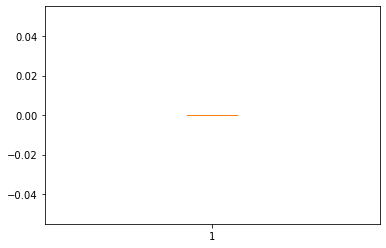

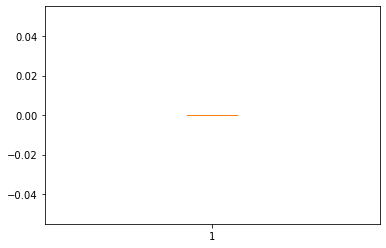

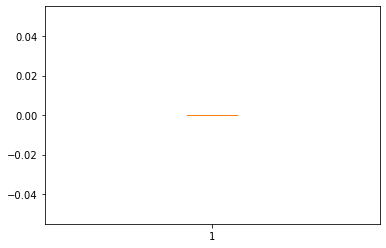

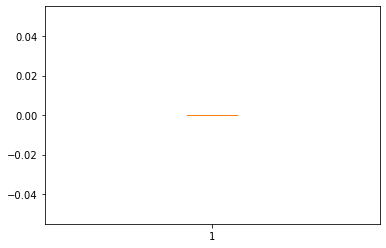

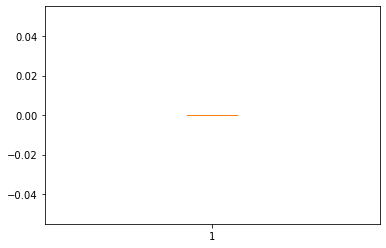

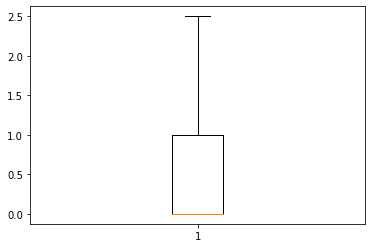

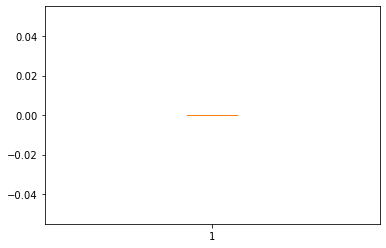

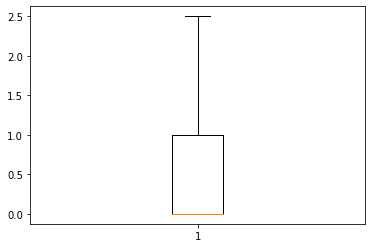

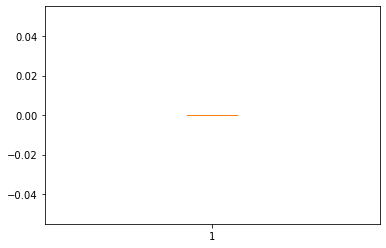

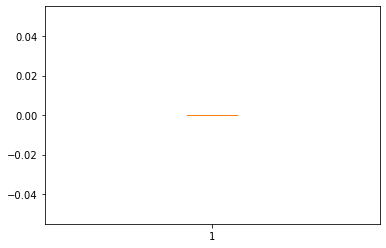

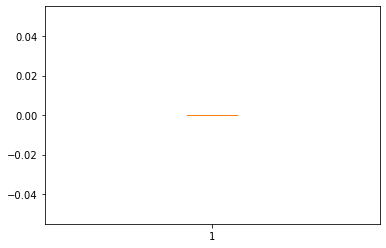

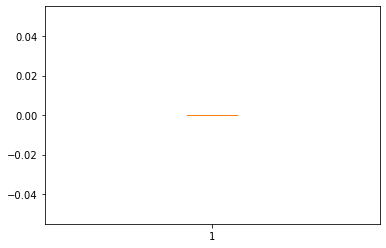

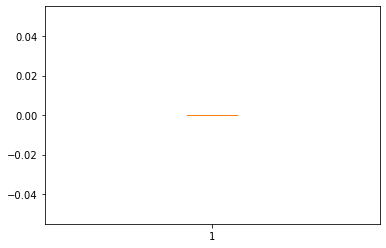

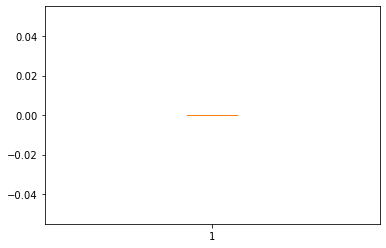

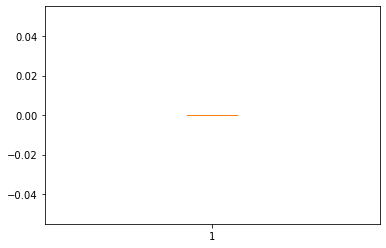

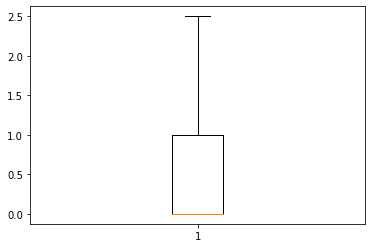

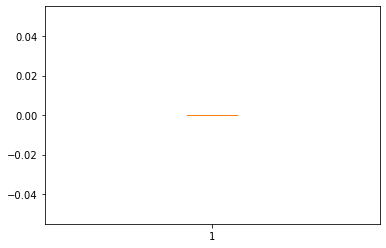

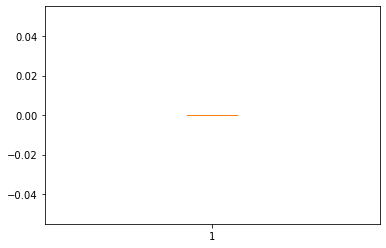

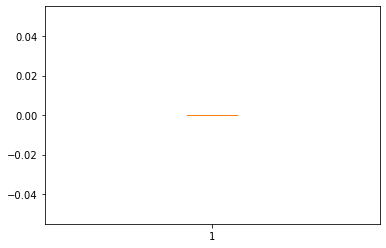

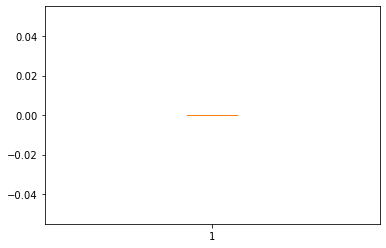

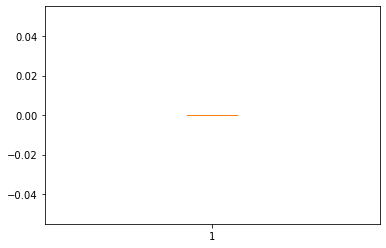

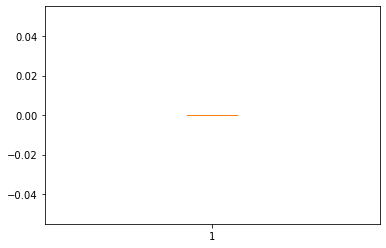

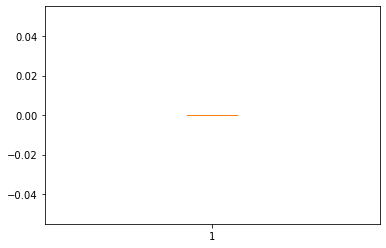

In [12]:
j= data.columns
for i in j:
    print(outliers(data,j))
    
for x in j:
    plt.figure()
    plt.boxplot(data[x])

### Step 1

* Extract the measurements from the DataFrame using its .values attribute:

In [13]:
samples = data.values
samples

array([[1.0000e+00, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.9998e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.9999e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+04, 3.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

### Step 2

* Measure the quality of clusterings with different numbers of clusters using the inertia.
* For each of the given values of k, perform the following steps:
* Create a KMeans instance called model with k clusters.
* Fit the model to the grain data samples.
* Append the value of the inertia_ attribute of model to the list inertias.

In [14]:
SSE =[]
SSE

[]

In [15]:
from sklearn.cluster import KMeans

ks = range(1,8)   #ks=1,2,3,4,5 (n-1)
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_) 
    # Inertia: Sum of distances of samplesto their closest cluster center

In [16]:
SSE

[2250000431582.649,
 562500888829.6694,
 250003166171.71826,
 140631228731.53238,
 90009131208.366,
 62504977807.2436,
 45921705680.97781]

### Elbow Method

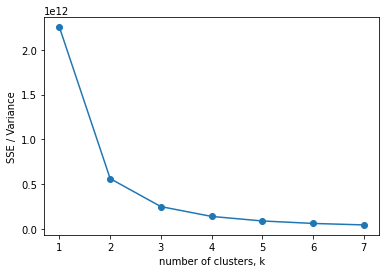

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / Variance')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

* Plot the inertia to see which number of clusters is best .Lower the number lower better the model

### Model 

In [18]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [19]:
data['Cluster_Made'] = model2.fit_predict(samples)
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster_Made
0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Final Cluster centroids 

In [20]:
model2.cluster_centers_

array([[2.50145000e+04, 4.31087044e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.68070598e-01,
        0.00000000e+00, 3.74598877e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.79963899e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.01450000e+03, 4.03639809e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

In [21]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster_Made
0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
a = data.loc[:,['Cust_ID','Cluster_Made']]
a.head(15)

,Cust_ID,Cluster_Made
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1
5,6.0,1
6,7.0,1
7,8.0,1
8,9.0,1
9,10.0,1


In [23]:
data.Cluster_Made.value_counts(ascending=False)

1    10021
2    10000
0     9979
Name: Cluster_Made, dtype: int64

In [24]:
import os 
os.chdir(r'C:\Users\SNEHA\Desktop\Machine learning\Clustering\Kmeans')

In [25]:
a.to_excel(r'Ecommerce_Customer_Segmentation.xlsx',index=False,sheet_name='Customer_Segmentation')